In [246]:
"""
Author : Uzma S. L.

Building deep learning classification model using Transfer learning Xception model,
On Mdecinal Plant Leaves Dataset with 30 classes.
## Build and Run on Google Colab ##

Dataset Used :
https://data.mendeley.com/datasets/nnytj2v3n5/1

"""

'\nAuthor : Uzma S. L.\n\nBuilding deep learning classification model using Transfer learning Xception model,\nOn Mdecinal Plant Leaves Dataset with 30 classes.\n## Build and Run on Google Colab ##\n\n'

In [ ]:
# To run in google colab Run below command for mounting this notebook at drive 
from google.colab import drive
drive.mount('/content/drive')

In [222]:
# pip install split-folders    #for splitting data into train / test / val folders. 

In [223]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.preprocessing import image
from keras.applications import Xception
from keras.layers import *
from keras.optimizers import *
from keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
import splitfolders
import os

In [224]:
# Splitting whole data which contains 30 folders of each class into train, test , and validation splits as 80,10,10 percentages 
# Run only once!!

In [225]:
# splitfolders.ratio("/content/drive/MyDrive/Project/Segmented Medicinal Leaf Images", output="output", seed=1337, ratio=(.8, .1, .1), group_prefix=None)

In [226]:
# Fix seed
np.random.seed(42)
classes = 30
batch_size = 64

In [227]:
# Image input size
img_height = 299
img_width = 299

In [228]:
# Pre-trained Xception model using imagenet dataset without top layer
xception = Xception(include_top=False, weights='imagenet', input_shape=(img_height, img_width, 3))

In [229]:
# Adding layers
x = xception.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(classes, activation = 'softmax')(x)

In [230]:
# Creating model object or defining model
model = Model(xception.input, predictions)

In [231]:
# Visualize model layers and shape
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [232]:
# Freezing already pretrained layers of xception model
for layer in xception.layers:
  layer.trainable = False

In [233]:
# Reading and Augmenting data
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 0.05,
                                   shear_range = 0.05,
                                   zoom_range = 0.05,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   fill_mode = 'constant',
                                   cval = 255
                                   )
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)


In [234]:
train_data = train_datagen.flow_from_directory(directory='/content/output/train',
                                         target_size = (img_width, img_height),
                                         class_mode = 'categorical',
                                         batch_size = batch_size,
                                         shuffle = True
                                         )

Found 1455 images belonging to 30 classes.


In [235]:
validation_data = validation_datagen.flow_from_directory('/content/output/val',
                                                          target_size=(img_width, img_height),
                                                          batch_size=batch_size,
                                                          class_mode='categorical')

Found 171 images belonging to 30 classes.


In [236]:
test_data = test_datagen.flow_from_directory('/content/output/test',
                                                          target_size=(img_width, img_height),
                                                          batch_size=batch_size,
                                                          class_mode='categorical')

Found 209 images belonging to 30 classes.


In [237]:
# compile with adam optimizer , loss and accuracy
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [238]:
# To avoid model to overfit 
callbacks = EarlyStopping(monitor='val_accuracy', patience=3,verbose=1)

In [239]:
# Training model
model.fit(train_data,
          epochs = 50,
          verbose = 1,
          callbacks= callbacks,
          validation_data = validation_data,
          )

Epoch 1/50
23/23 [==============================] - 62s 3s/step - loss: 3.0250 - accuracy: 0.1741 - val_loss: 1.9638 - val_accuracy: 0.7018
Epoch 2/50
23/23 [==============================] - 57s 2s/step - loss: 1.8168 - accuracy: 0.7029 - val_loss: 1.2973 - val_accuracy: 0.8421
Epoch 3/50
23/23 [==============================] - 57s 2s/step - loss: 1.2066 - accuracy: 0.8343 - val_loss: 0.9433 - val_accuracy: 0.8830
Epoch 4/50
23/23 [==============================] - 57s 2s/step - loss: 0.8937 - accuracy: 0.9006 - val_loss: 0.7455 - val_accuracy: 0.9064
Epoch 5/50
23/23 [==============================] - 57s 2s/step - loss: 0.7210 - accuracy: 0.9121 - val_loss: 0.6234 - val_accuracy: 0.9181
Epoch 6/50
23/23 [==============================] - 57s 2s/step - loss: 0.5814 - accuracy: 0.9229 - val_loss: 0.5353 - val_accuracy: 0.9181
Epoch 7/50
23/23 [==============================] - 57s 2s/step - loss: 0.5149 - accuracy: 0.9292 - val_loss: 0.4806 - val_accuracy: 0.9240
Epoch 8/50
23/23 [==

In [240]:
# Evaluating on test data

In [241]:
model.evaluate(test_data)

4/4 [==============================] - 5s 1s/step - loss: 0.2687 - accuracy: 0.9761


[0.26871609687805176, 0.9760765433311462]

In [242]:
def predict_image(img):
  '''
  predicts the class of the given image
  '''
  plt.imshow(img);
  plt.axis('off')
  img = img.reshape((1,299,299,3))
  pred = model.predict(img)
  max = pred.max()
  val = np.where(pred == max)[1].item()
  for k,v in test_data.class_indices.items():
    if v == val :
      return k

In [249]:
X_test,Y_test = test_data.next()

'Citrus Limon (Lemon)'

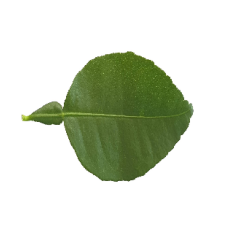

In [250]:
predict_image(X_test[1])

In [251]:
# Saving the model 
model.save('/content/drive/MyDrive/Project/Xception_model.h5')